## 0. Dependencies

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
BASE_PATH = "/content/drive/MyDrive/Project/"

In [ ]:
# Import Dependencies / Libraries
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Video and Image Processing
import cv2

# Face Detection and Landmark Generation
import dlib

from imutils import face_utils
import imutils

## 1. Save as Video

68


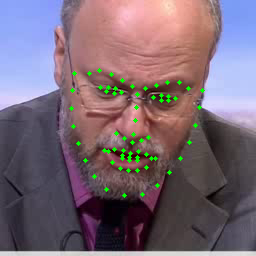

68


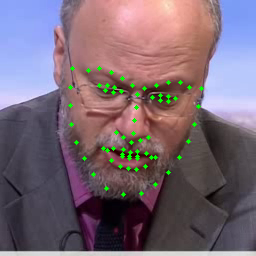

68


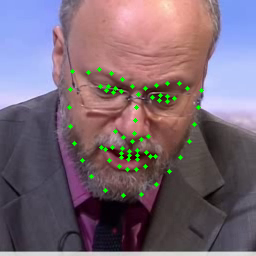

68


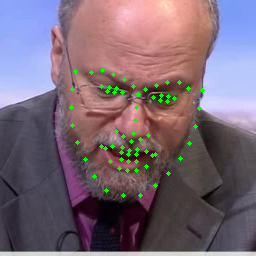

68


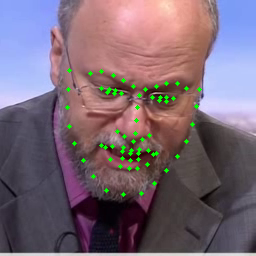

68


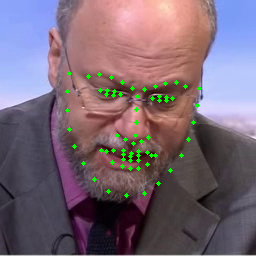

68


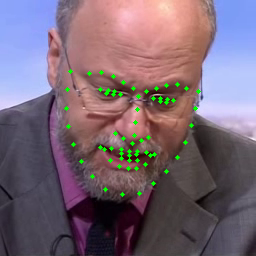

68


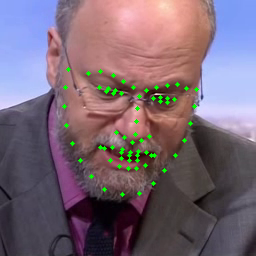

68


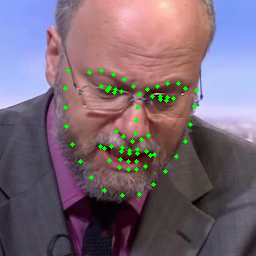

68


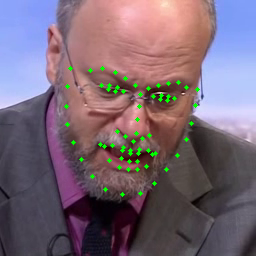

68


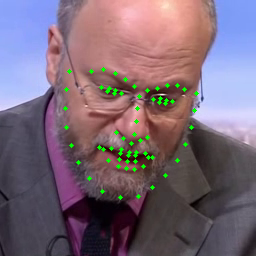

68


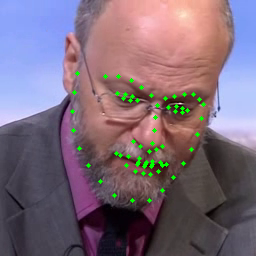

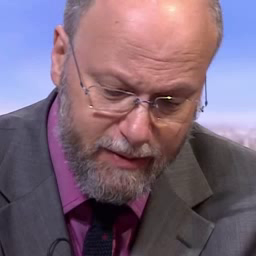

68


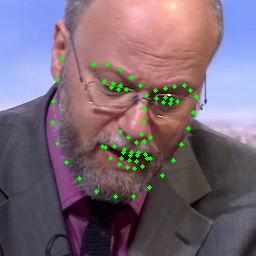

68


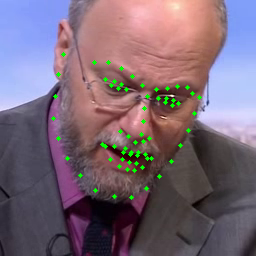

68


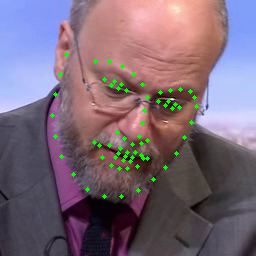

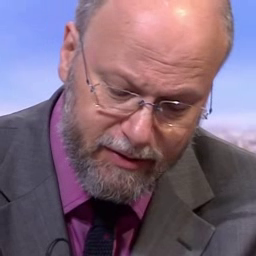

68


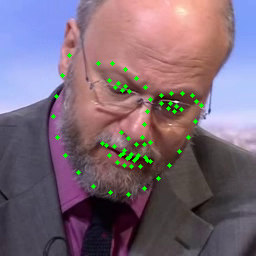

68


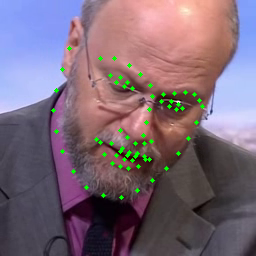

68


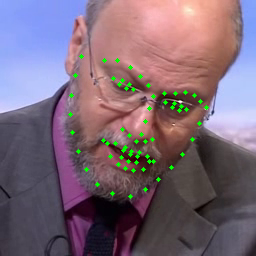

68


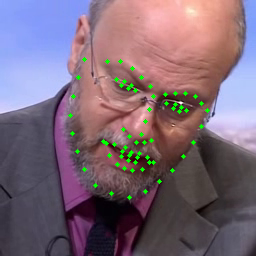

68


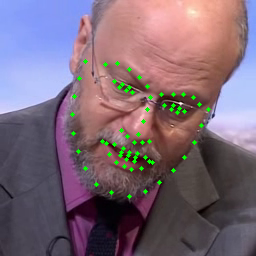

68


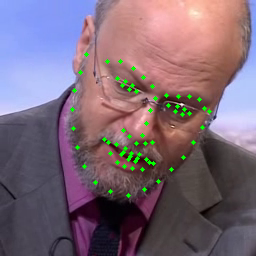

68


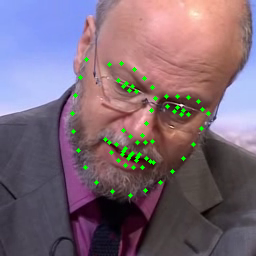

68


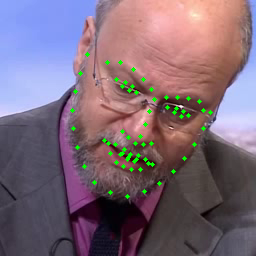

68


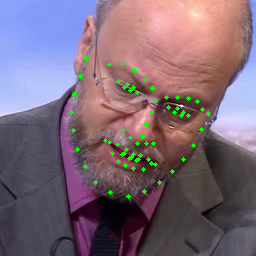

68


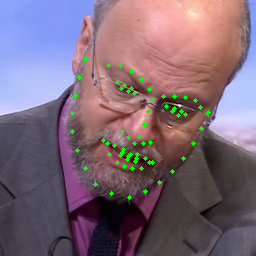

68


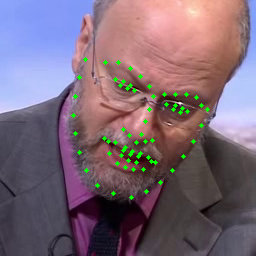

68


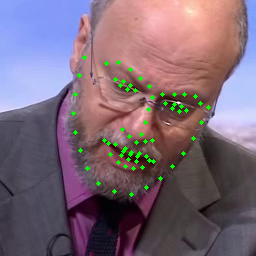

In [ ]:
from google.colab.patches import cv2_imshow

face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor('/content/drive/MyDrive/Project/LandmarkDetector/shape_predictor_68_face_landmarks_GTX.dat')

cam = cv2.VideoCapture("/content/drive/MyDrive/Project/Project Videos/ABOUT_00002.mp4")

images = []
while cam.isOpened():
    ret,image = cam.read()
    if ret:
        image = imutils.resize(image, width=256)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        faces = face_detector(image,1 )

        for (_, face) in enumerate(faces):
            landmarks = landmark_detector(image, face,)
            print(landmarks.num_parts)
            landmarks = face_utils.shape_to_np(landmarks)
            for (x, y) in landmarks:
                cv2.circle(image, (x,y), 2, (0, 255, 0), -2)
        images.append(image)
        cv2_imshow(image)

    else:
      break

cam.release()
cv2.destroyAllWindows()

In [ ]:
video = cv2.VideoWriter("test.avi", 0, 24, (256,256))
for image in images:
    video.write(image)
cv2.destroyAllWindows()
video.release()

In [ ]:
from moviepy.editor import *

path="test.avi"

clip=VideoFileClip(path)
clip.ipython_display(width=280)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:   0%|          | 0/30 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file test.avi, 196608 bytes wanted but 0 bytes read,at frame 29/30, at time 1.21/1.21 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                   

Moviepy - Done !
Moviepy - video ready __temp__.mp4


## Interpolation

In [ ]:
def linear_interpolation(start_idx: int, end_idx: int, landmarks):
    """Defines a linear interpolation function to interpolate missing landmarks between indices

    Args:
        start_idx (int): An integer defining the starting index
        end_idx (int): An integer defining the stopping index
        landmarks: An array of size 68 containing the (x,y) values of the facial landmarks

    Returns:
        landmarks array after the missing points have been interpolated.
    """
    start_landmarks = landmarks[start_idx]
    end_landmarks = landmarks[end_idx]
    delta_idx = end_idx - start_idx
    delta_landmarks = end_landmarks - start_landmarks

    # Apply linear interpolation formula
    for idx in range(1, delta_idx):
        landmarks[idx + start_idx] = start_landmarks + delta_landmarks/delta_idx * idx
    return landmarks

In [ ]:
def landmarks_interpolation(landmarks):
    """Adds the missing landmarks to the landmarks array

    Args:
        landmarks: An array containing all the detected landmarks

    Returns:
        landmarks array filled in with missing landmarks
    """
    # Obtain indices of all the valid landmarks (i.e landmarks not None)
    valid_landmarks_idx = [idx for idx, _ in enumerate(landmarks) if _ is not None]

    # For middle parts of the landmarks array
    for idx in range(1, len(valid_landmarks_idx)):
        # If the valid landmarks indices are adjacent then skip to next iteration
        if valid_landmarks_idx[idx]-valid_landmarks_idx[idx-1] == 1:
            continue
        landmarks = linear_interpolation(start_idx=valid_landmarks_idx[idx-1],
                                        end_idx=valid_landmarks_idx[idx],
                                        landmarks=landmarks)

    # For beginning and ending parts of the landmarks array
    valid_landmarks_idx = [idx for idx, _ in enumerate(landmarks) if _ is not None]
    landmarks[:valid_landmarks_idx[0]] = [landmarks[valid_landmarks_idx[0]]] * valid_landmarks_idx[0]
    landmarks[valid_landmarks_idx[-1]:] = [landmarks[valid_landmarks_idx[-1]]] * (len(landmarks) - valid_landmarks_idx[-1])

    return landmarks

## 2. Read Video

In [ ]:
VIDEO_PATH = "Project Videos/"

In [ ]:
def load_video(filename: str, path: str = VIDEO_PATH):
  """Loads a video from given path with filename

  Args:
    filename (str): name of the video file
    path (str): location of the video

  Returns:
    A generator object of the frames of the video.
  """
  cap = cv2.VideoCapture(os.path.join(BASE_PATH, VIDEO_PATH, filename))

  while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
      yield frame
    else:
      break
  cap.release()

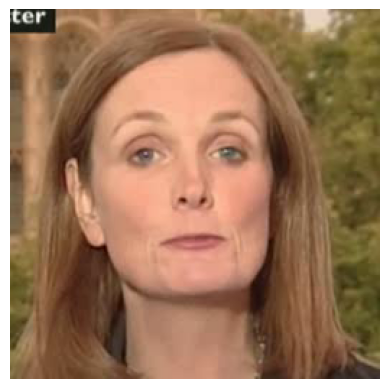

In [ ]:
frame = next(load_video("ABOUT_00001.mp4"))

plt.imshow(frame[:,:,::-1], cmap=plt.cm.RdYlBu)
plt.axis(False)
plt.show()

## 3. Get Landmarks from Video

In [ ]:
# Path of landmarks model
LANDMARKS_PATH = os.path.join(BASE_PATH + "/LandmarkDetector/shape_predictor_68_face_landmarks_GTX.dat")

# Create a face detector
face_detector = dlib.get_frontal_face_detector()

# Create a landmark detector
landmark_detector = dlib.shape_predictor(LANDMARKS_PATH)

In [ ]:
def get_landmarks(frame) -> np.ndarray:
  """Takes a frame and generates landmarks for the first face

  Args:
    frame: video frame or image required to generate landmarks

  Returns:
    A numpy array containing the co-ordinates of the landmarks of the first face in the given frame
  """

  faces = face_detector(frame)
  if faces:
    landmarks = landmark_detector(frame, faces[0])
    landmarks = face_utils.shape_to_np(landmarks)
    return landmarks

In [ ]:
def generate_video_landmarks(filename: str) -> np.ndarray:
  """Generate landmarks the given video

  Args:
    filename (str): filename specifying the video

  Returns:
    A numpy.ndarray containing all the landmarks for the faces in the video"""

  frames = load_video(filename=filename)
  landmarks = []

  for frame in frames:
    landmarks.append(get_landmarks(frame))
  landmarks = landmarks_interpolation(landmarks)
  return np.array(landmarks)

In [ ]:
landmarks = generate_video_landmarks("ABOUT_00002.mp4")

len(landmarks)

29

In [ ]:
landmarks[:2]

array([[[ 69,  78],
        [ 68,  95],
        [ 69, 114],
        [ 71, 132],
        [ 77, 149],
        [ 85, 166],
        [ 97, 180],
        [111, 192],
        [128, 196],
        [147, 196],
        [163, 187],
        [177, 175],
        [189, 160],
        [197, 144],
        [202, 126],
        [204, 107],
        [205,  89],
        [ 89,  75],
        [100,  72],
        [111,  75],
        [122,  80],
        [132,  86],
        [144,  89],
        [155,  86],
        [166,  83],
        [178,  82],
        [188,  86],
        [137,  96],
        [136, 108],
        [134, 121],
        [133, 134],
        [119, 135],
        [125, 139],
        [132, 143],
        [141, 141],
        [148, 138],
        [101,  90],
        [108,  89],
        [115,  89],
        [121,  94],
        [114,  95],
        [107,  94],
        [153,  98],
        [160,  95],
        [167,  96],
        [174,  98],
        [167, 101],
        [160, 101],
        [110, 152],
        [118, 150],


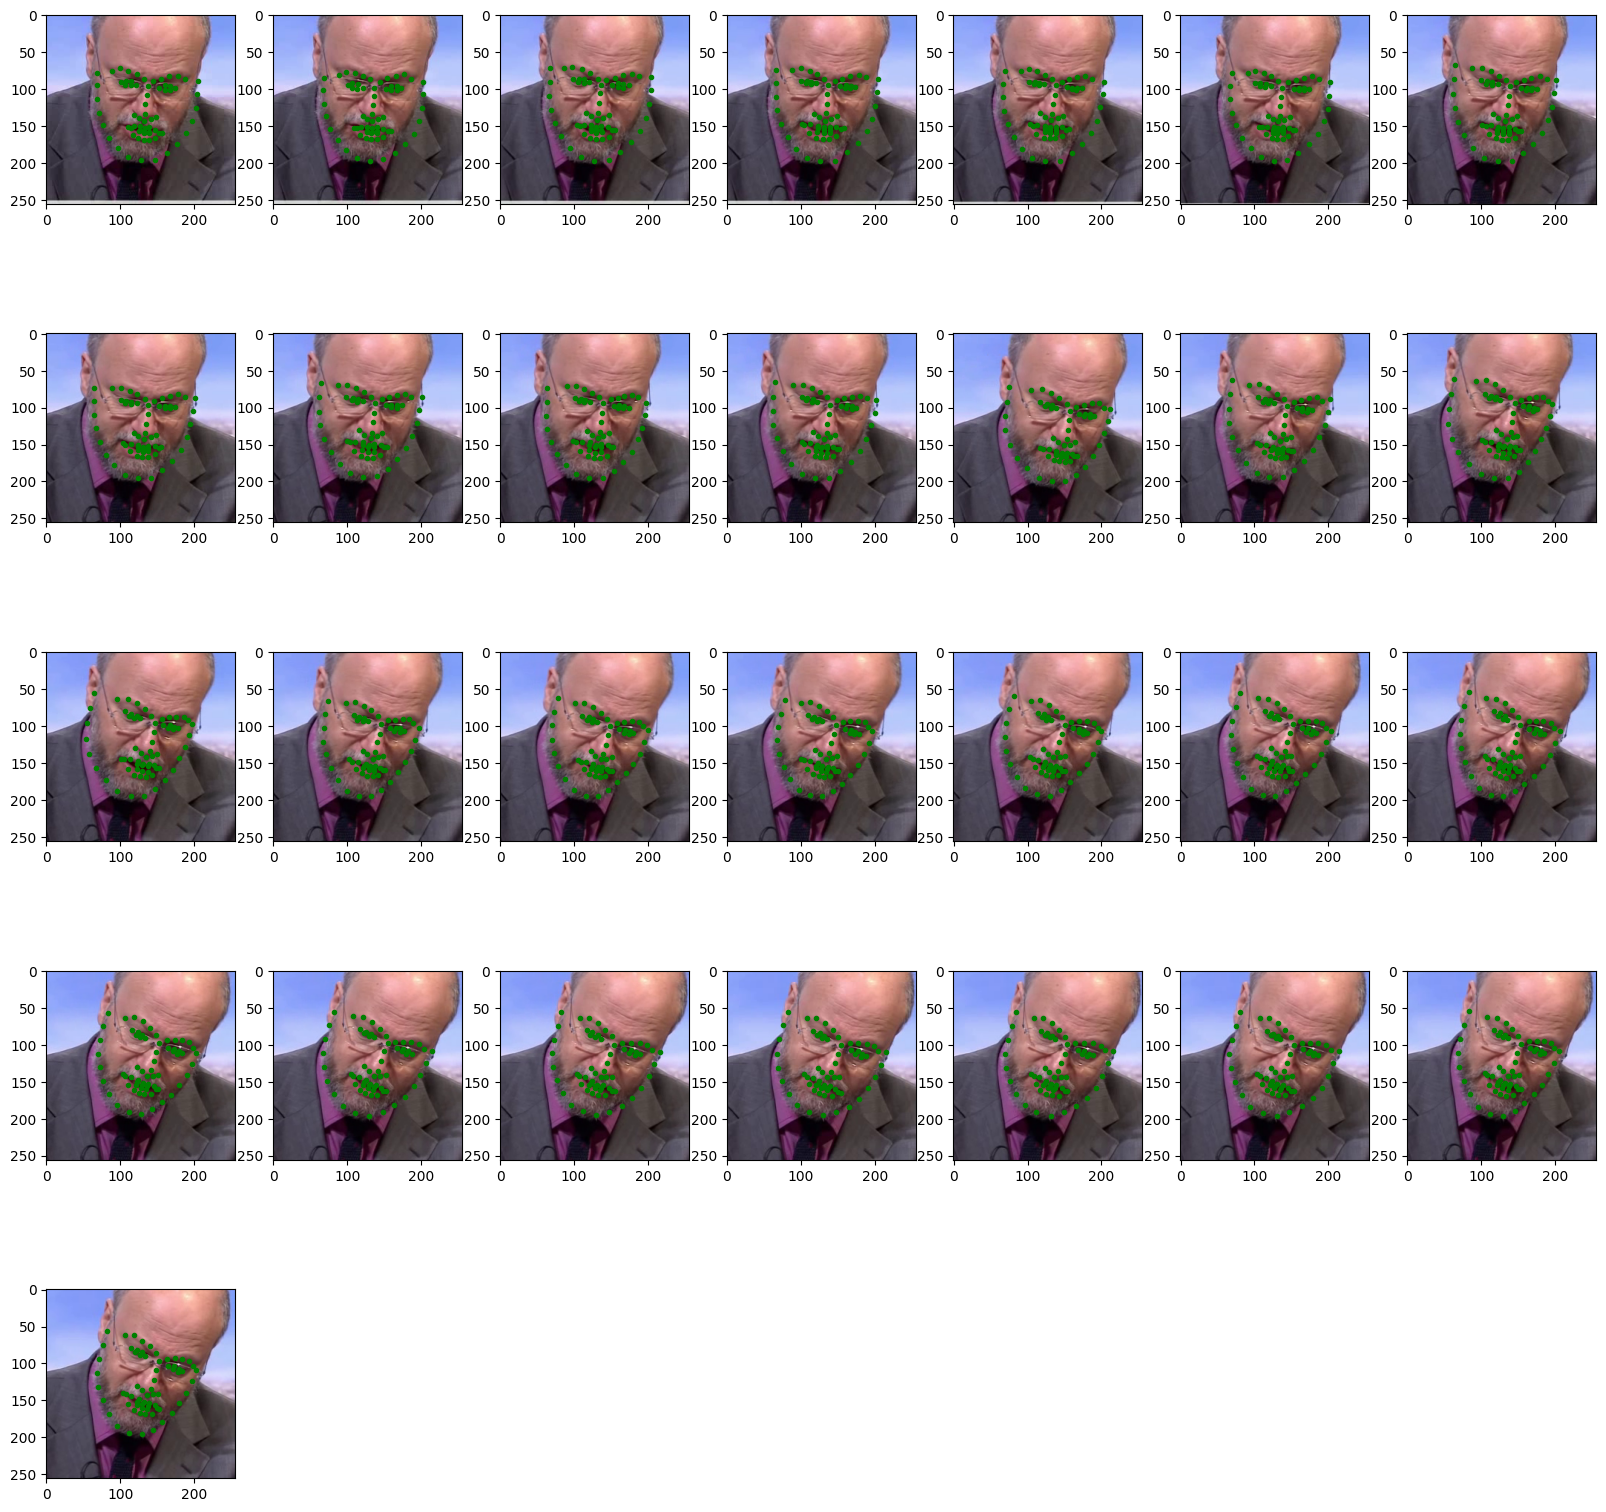

In [ ]:
frames = load_video(filename="ABOUT_00002.mp4")
plt.figure(figsize=(20,20))
for i, frame in enumerate(frames):
  plt.subplot(5,7,i+1)
  plt.imshow(frame[:,:,::-1])
  plt.scatter(landmarks[i][:,0], landmarks[i][:,1], marker='.', c='g')

## 4. Compute Mean Face Landmarks

In [ ]:
DATASET_PATH = os.path.join(BASE_PATH, VIDEO_PATH)

In [ ]:
# def get_mp4(dir=DATASET_PATH):
#     if os.path.exists(dir) and os.path.isdir(dir):
#         subdirectories = [os.path.join(dir, d) for d in os.listdir(dir)[:20]]
#         mp4_files = []
#         for subdirectory in subdirectories:
#             mp4_files.extend(glob.glob(os.path.join(subdirectory, "train/*.mp4"), recursive=True))
#         return mp4_files

def get_mp4(dir=DATASET_PATH):
  if os.path.exists(dir) and os.path.isdir(dir):
    mp4_files = []
    mp4_files.extend(glob.glob(os.path.join(DATASET_PATH, "*.mp4"), recursive=True))
    return mp4_files

In [ ]:
from timeit import default_timer as timer

start_time = timer()

landmarks_array = []
mp4_files = get_mp4()

for mp4 in mp4_files:
    landmarks = generate_video_landmarks(mp4)
    landmarks_array.append(landmarks)
print(timer()-start_time)
len(landmarks_array)

6.2847464389997185


10

In [ ]:
# Computing Mean Landmarks
mean_landmarks = np.mean(np.mean(landmarks_array, axis=0), axis=0)

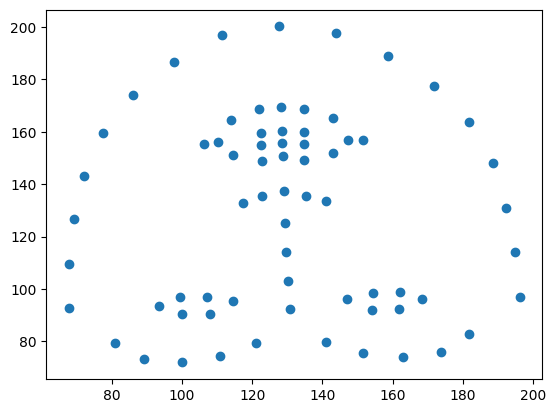

In [ ]:
plt.scatter(mean_landmarks[:,0], mean_landmarks[:,1])